In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("PatientInfo.csv")

In [4]:
data

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


In [5]:
import seaborn as sns

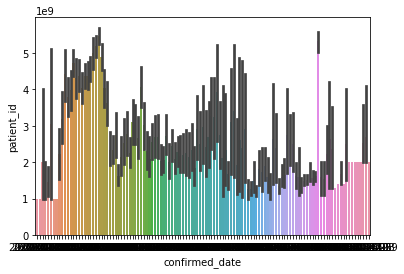

In [6]:
sns.barplot(
    data = data,
    x = 'confirmed_date',
    y = 'patient_id')
plt.show()

In [7]:
df = pd.read_csv("Time.csv")

In [8]:
df

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


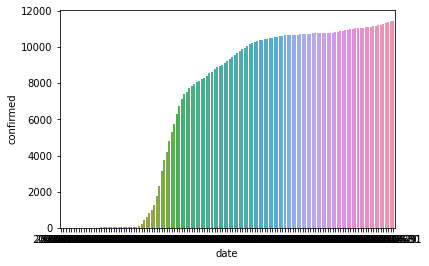

In [9]:
sns.barplot(
    data = df,
    x = 'date',
    y = 'confirmed')
plt.show()

In [10]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

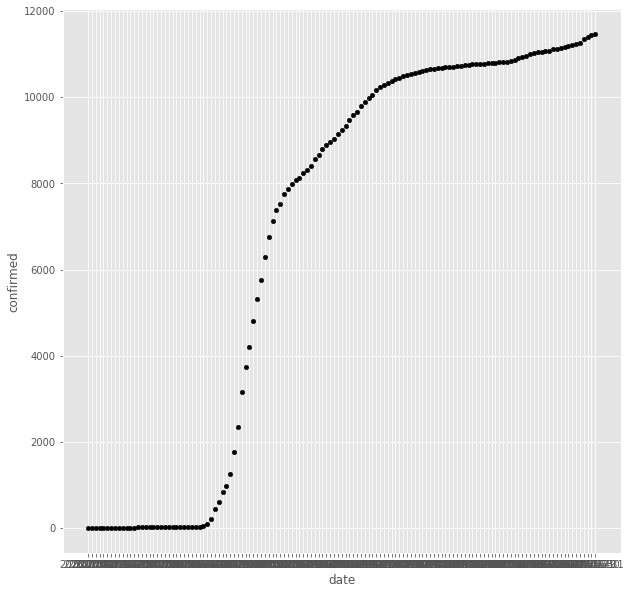

In [11]:
df.plot(kind='scatter', x='date', y='confirmed', figsize=(10,10), color='black')

In [12]:
df[0:3]

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


In [13]:
df_to0 = df[100:119]
df_to0

,date,time,test,negative,confirmed,released,deceased
100,2020-04-29,0,614197,595129,10761,8922,246
101,2020-04-30,0,619881,600482,10765,9059,247
102,2020-05-01,0,623069,603610,10774,9072,248
103,2020-05-02,0,627562,608286,10780,9123,250
104,2020-05-03,0,630973,611592,10793,9183,250
105,2020-05-04,0,633921,614944,10801,9217,252
106,2020-05-05,0,640237,620575,10804,9283,254
107,2020-05-06,0,643095,624280,10806,9333,255
108,2020-05-07,0,649388,630149,10810,9419,256
109,2020-05-08,0,654863,635174,10822,9484,256


In [14]:
df_copy = df_to0
df_date = pd.DataFrame(df_copy['date'])
pd.to_numeric([v.replace('-', '') for v in df_date], errors='coerce',  downcast='float')
df_date

,date
100,2020-04-29
101,2020-04-30
102,2020-05-01
103,2020-05-02
104,2020-05-03
105,2020-05-04
106,2020-05-05
107,2020-05-06
108,2020-05-07
109,2020-05-08


In [15]:
data_date = pd.read_csv('TimeChanged.csv')
data_date = data_date[100:119]
data_date

,date,time,test,negative,confirmed,released,deceased,dateN
100,2020-04-29,0,614197,595129,10761,8922,246,101
101,2020-04-30,0,619881,600482,10765,9059,247,102
102,2020-05-01,0,623069,603610,10774,9072,248,103
103,2020-05-02,0,627562,608286,10780,9123,250,104
104,2020-05-03,0,630973,611592,10793,9183,250,105
105,2020-05-04,0,633921,614944,10801,9217,252,106
106,2020-05-05,0,640237,620575,10804,9283,254,107
107,2020-05-06,0,643095,624280,10806,9333,255,108
108,2020-05-07,0,649388,630149,10810,9419,256,109
109,2020-05-08,0,654863,635174,10822,9484,256,110


In [16]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data_date['dateN']), y=data_date['confirmed'])
prediction = linear_regression.predict(X=pd.DataFrame(data_date['dateN']))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  9014.245614035088
b value =  [16.87192982]


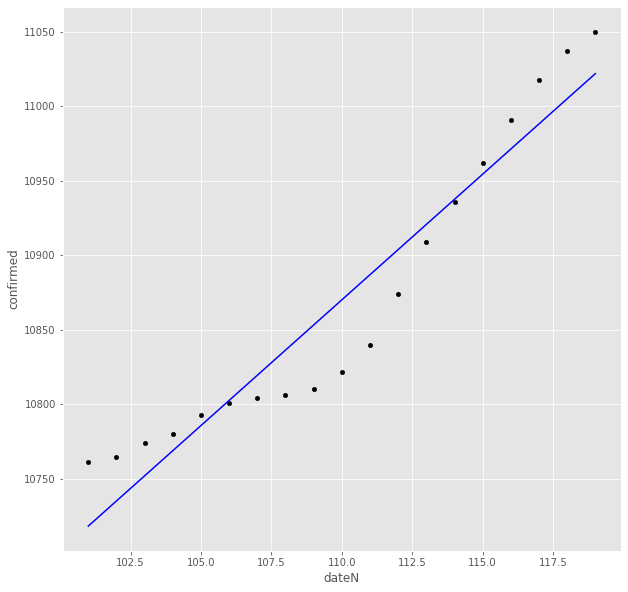

In [17]:
data_date.plot(kind='scatter', x='dateN', y='confirmed', 
               figsize=(10,10), color='black')
plt.plot(data_date['dateN'], prediction, color="blue")

In [21]:
data = pd.read_csv('TimeChanged.csv')
data_date2 = data[90:110]
data_date2

,date,time,test,negative,confirmed,released,deceased,dateN
90,2020-04-19,0,559109,536205,10661,8042,234,91
91,2020-04-20,0,563035,540380,10674,8114,236,92
92,2020-04-21,0,571014,547610,10683,8213,237,93
93,2020-04-22,0,577959,555144,10694,8277,238,94
94,2020-04-23,0,583971,563130,10702,8411,240,95
95,2020-04-24,0,589520,569212,10708,8501,240,96
96,2020-04-25,0,595161,575184,10718,8635,240,97
97,2020-04-26,0,598285,578558,10728,8717,242,98
98,2020-04-27,0,601660,582027,10738,8764,243,99
99,2020-04-28,0,608514,588559,10752,8854,244,100


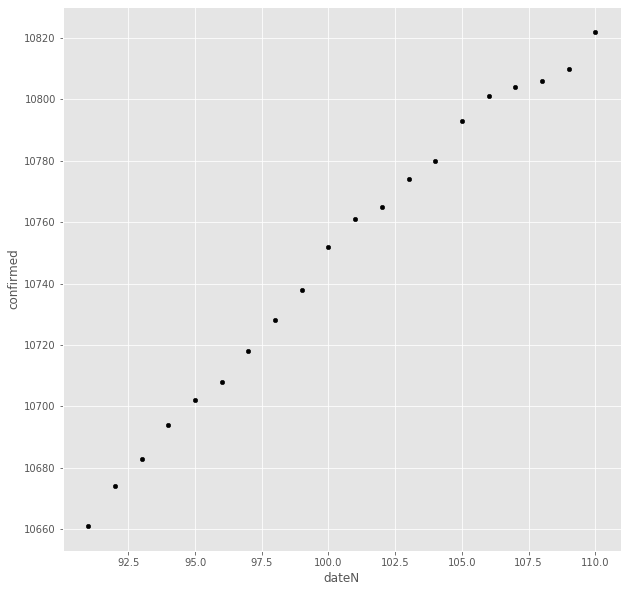

In [22]:
data_date2.plot(kind='scatter', x='dateN', y='confirmed', 
               figsize=(10,10), color='black')

section 0 10 b value [0.41818182]
section 10 20 b value [1.92727273]
section 20 30 b value [0.37575758]
section 30 40 b value [238.52121212]
section 40 50 b value [481.83636364]
section 50 60 b value [103.87878788]
section 60 70 b value [98.46666667]
section 70 80 b value [79.9030303]
section 80 90 b value [26.02424242]
section 90 100 b value [9.51515152]
section 100 110 b value [6.69090909]
section 110 120 b value [25.28484848]
section 120 130 b value [25.52121212]
section 130 140 b value [33.]
avalues =  [ 4.44089210e-16 -1.34727273e+01  1.88181818e+01 -7.61070303e+03
 -1.64664545e+04  2.32092727e+03  2.66213333e+03  4.04372121e+03
  8.32072727e+03  9.79710303e+03  1.00857091e+04  8.04780000e+03
  7.98178788e+03  7.08100000e+03]


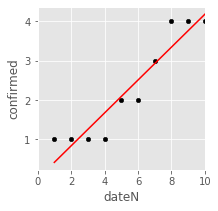

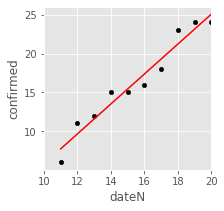

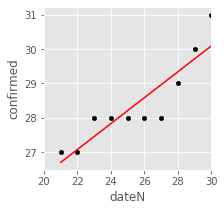

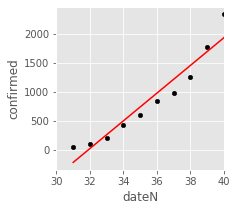

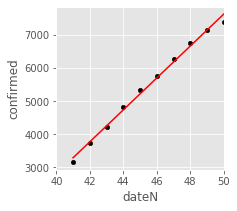

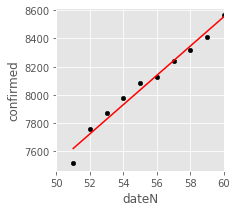

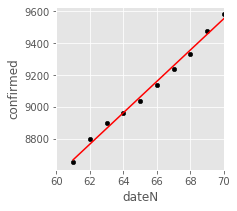

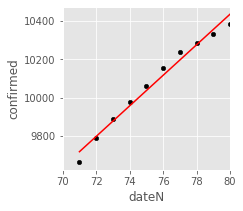

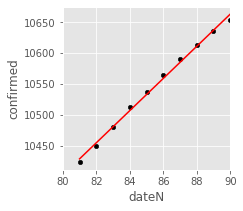

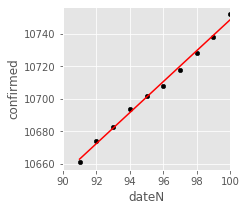

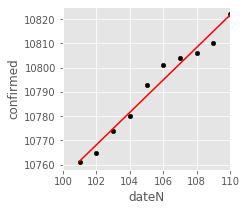

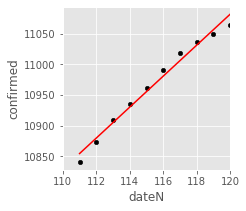

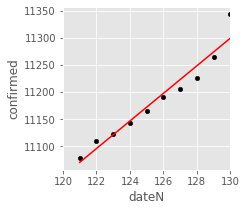

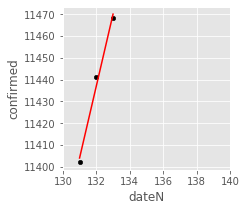

In [73]:
#a, b값 저장하는 array라는 자료구조 만들기
avalues = np.ones((14))
bvalues = np.ones((14))
#구간 분할을 위한 자료
section1 = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
#반복문을 통해 구간 크기 10 단위로 회귀분석을 각각 진행함
for i in section1:
    data_datei = data[i:i+10]
    data_datei.plot(kind='scatter', x='dateN', y='confirmed', 
               figsize=(3,3), color='black', xlim=(i,i+10))
    linear_regression = linear_model.LinearRegression()
    linear_regression.fit(X=pd.DataFrame(data_datei['dateN']), y=data_datei['confirmed'])
    prediction = linear_regression.predict(X=pd.DataFrame(data_datei['dateN']))
    j = i/10
    bvalues[int(j)] = linear_regression.coef_
    avalues[int(j)] = linear_regression.intercept_
    print("section", i, i+10, "b value",linear_regression.coef_)
    plt.plot(data_datei['dateN'], prediction, color="red")
print("avalues = ", avalues)
#아래 출력된 값은 구간에 따른 기울기값

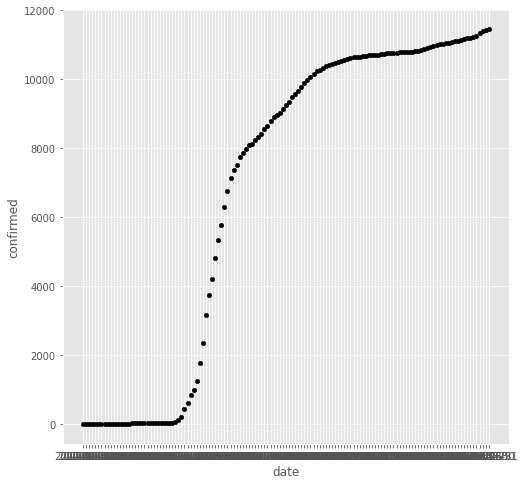

In [58]:
df.plot(kind='scatter', x='date', y='confirmed', figsize=(8,8), color='black')

section 80 82 b value [27.]
section 82 84 b value [32.]
section 84 86 b value [27.]
section 86 88 b value [22.]
section 88 90 b value [18.]
section 90 92 b value [13.]


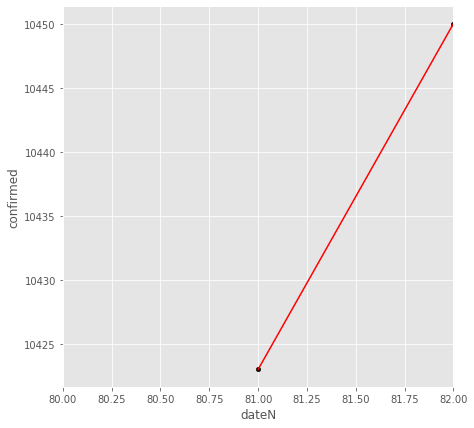

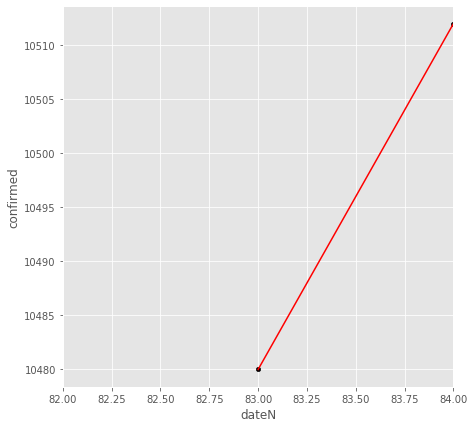

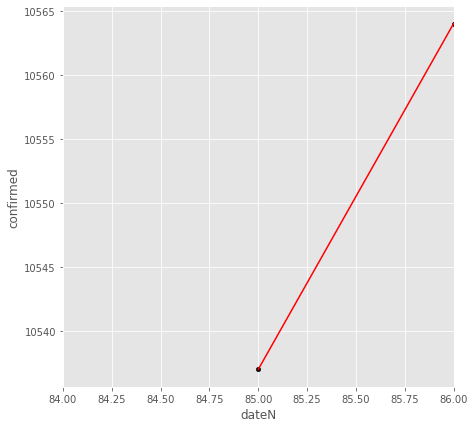

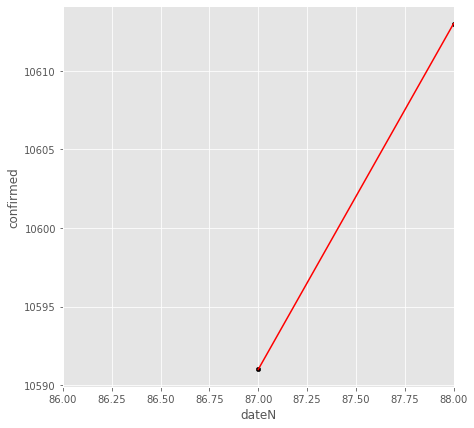

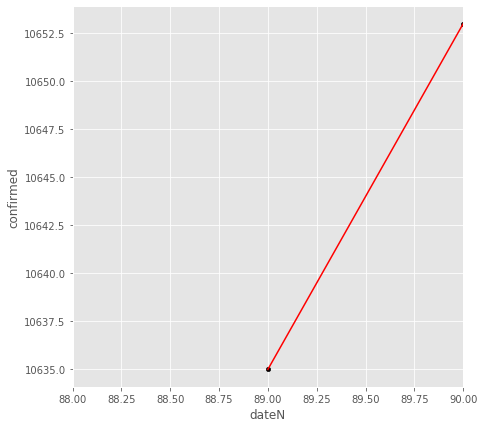

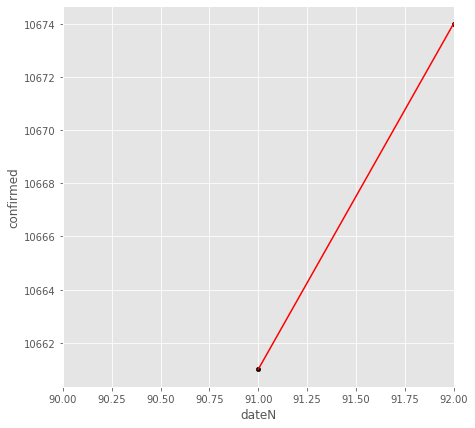

In [56]:
section80 = [80,82,84,86,88,90]
for i in section80:
    data_datei = data[i:i+2]
    data_datei.plot(kind='scatter', x='dateN', y='confirmed', 
               figsize=(7,7), color='black', xlim=(i,i+2))
    linear_regression = linear_model.LinearRegression()
    linear_regression.fit(X=pd.DataFrame(data_datei['dateN']), y=data_datei['confirmed'])
    prediction = linear_regression.predict(X=pd.DataFrame(data_datei['dateN']))
    print("section", i, i+2, "b value",linear_regression.coef_)
    plt.plot(data_datei['dateN'], prediction, color="red")

section 100 102 b value [4.]
section 102 104 b value [6.]
section 104 106 b value [8.]
section 106 108 b value [2.]
section 108 110 b value [12.]
section 110 112 b value [34.]


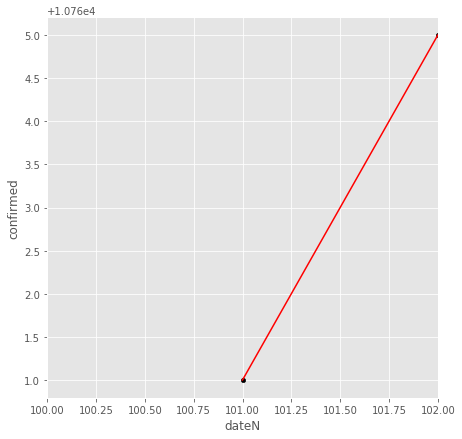

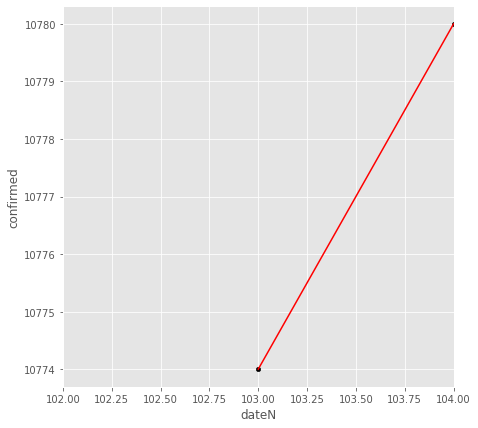

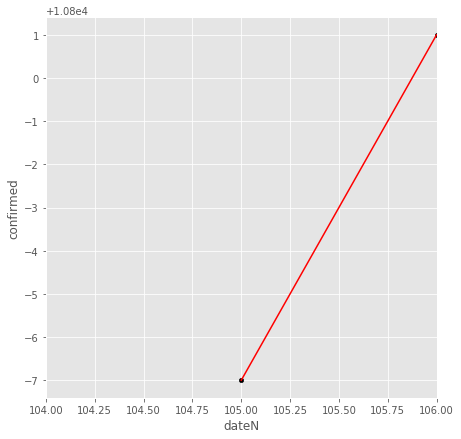

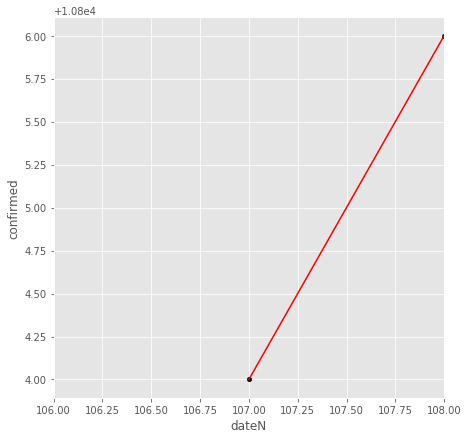

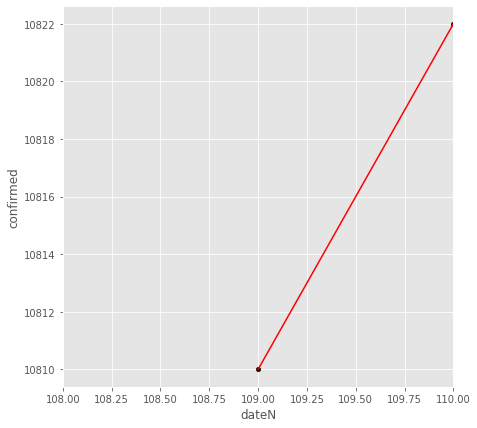

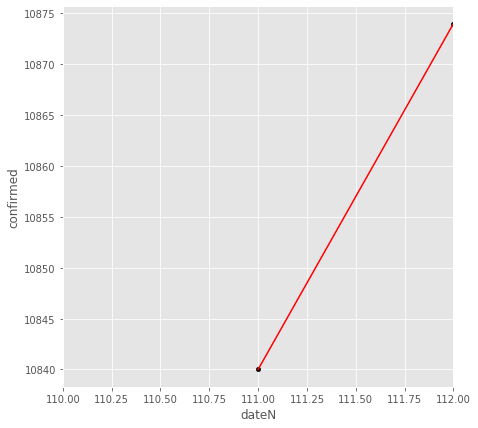

In [57]:
section100 = [100,102,104,106,108,110]
for i in section100:
    data_datei = data[i:i+2]
    data_datei.plot(kind='scatter', x='dateN', y='confirmed', 
               figsize=(7,7), color='black', xlim=(i,i+2))
    linear_regression = linear_model.LinearRegression()
    linear_regression.fit(X=pd.DataFrame(data_datei['dateN']), y=data_datei['confirmed'])
    prediction = linear_regression.predict(X=pd.DataFrame(data_datei['dateN']))
    print("section", i, i+2, "b value",linear_regression.coef_)
    plt.plot(data_datei['dateN'], prediction, color="red")

In [59]:
df

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


In [65]:
data_last30 = data[102:133]
data_last30.head()

,date,time,test,negative,confirmed,released,deceased,dateN
102,2020-05-01,0,623069,603610,10774,9072,248,103
103,2020-05-02,0,627562,608286,10780,9123,250,104
104,2020-05-03,0,630973,611592,10793,9183,250,105
105,2020-05-04,0,633921,614944,10801,9217,252,106
106,2020-05-05,0,640237,620575,10804,9283,254,107


b value [22.59596774]
a value 8373.353225806453


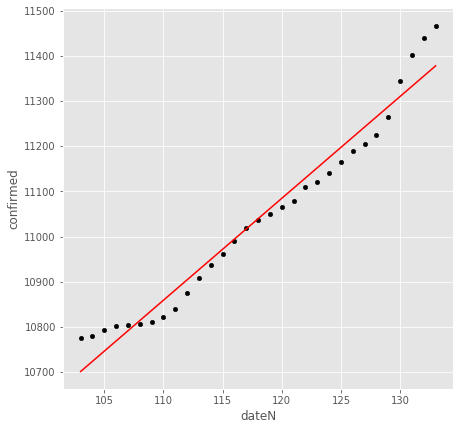

In [66]:
#산점도 그리기
data_last30.plot(kind='scatter', x='dateN', y='confirmed', 
               figsize=(7,7), color='black')
#선형회귀분석 진행과정(정의 - 학습 - 예측 - b값출력 - 표준회귀선 그리기)
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data_last30['dateN']), y=data_last30['confirmed'])
prediction = linear_regression.predict(X=pd.DataFrame(data_last30['dateN']))
print("b value",linear_regression.coef_)
print("a value", linear_regression.intercept_)
plt.plot(data_last30['dateN'], prediction, color="red")

In [72]:
from sklearn.metrics import mean_squared_error
#잔차 정의(실제값 - 예측값); 제곱할 것이므로 순서는 상관없음
residuals = data_last30['confirmed'] - prediction
#SSE = 잔차 제곱의 합
SSE = (residuals**2).sum()
#(실제값 - 실제값의 평균) = 편차; SST = 편차 제곱의 합
SST = ((data_last30['confirmed']-data_last30['confirmed'].mean())**2).sum()
#상관계수 구하기
R_squared = 1 - (SSE/SST)
print("R_squared = ", R_squared)

## 지울 것
##SE = (SSE/28)**0.5
##print("SE = ", SE)
##print("RMSE = ", mean_squared_error(prediction, data_last30['confirmed'])**0.5)

R_squared =  0.9636161510036769


In [116]:
test = pd.read_csv("Patientinfo.csv")
testco = pd.DataFrame(test['contact_number'])
testco.isna().sum()
testco

,contact_number
0,75
1,31
2,17
3,9
4,2
...,...
3999,18
4000,5
4001,9
4002,6


In [118]:
testfill = testco.fillna(10000000)
testfill

,contact_number
0,75
1,31
2,17
3,9
4,2
...,...
3999,18
4000,5
4001,9
4002,6


In [120]:
from statsmodels import robust

def get_MAD(data):
    return np.median(np.absolute(data - np.median(data, axis=0)), axis=0)

mad = get_MAD(testfill)
np.ones([4004])
for i in testfill:
    absD = abs(i - mad)
    e = absD/mad
    ones[
    

TypeError: '<' not supported between instances of 'int' and 'str'

In [97]:
import os,sys
from scipy import stats
import numpy as np

f=open('PatientinfoCN.csv', 'r').readlines()
N=len(f)-1
for i in range(0,N):
    w=f[i].split()
    l1=w[1:8]
    l2=w[8:15]
    try:
        list1=[float(x) for x in l1]
        list2=[float(x) for x in l2]
    except ValueError:
        print ("error" "on line",i)
    result=stats.ttest_ind(list1,list2)
    print (result[1])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
